Load libraries and set configuration parameters

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
import pandas as pd
import numpy as np
import utils
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB 
# ==============================   CONFIG     ============================

ABS_PATH= r"C:\Users\gorra\Desktop\gitSDA\SDAgruppo2"
ABS_PATH = '/home/marco741/SDAgruppo2'
DATASET_FILENAME = 'ClassificationData_final.csv'
Y_LABEL = 'Z_OppositeTeamDefence'
PREDICTORS_NUMBER = 8

Load the dataset and initialize utilities

In [24]:
from importlib import reload
reload(utils)

utils_ = utils.Utils(ABS_PATH, DATASET_FILENAME, Y_LABEL, PREDICTORS_NUMBER)
df = utils_.read_dataset()


In [6]:
from importlib import reload
reload(utils)

utils_ = utils.Utils(ABS_PATH, DATASET_FILENAME, Y_LABEL, PREDICTORS_NUMBER, gaussian_classifier=True)
df = utils_.read_dataset()

BASE LOGISTIC REGRESSION

In [25]:
model, X, y = utils_.train(df, return_values=True)
score = utils_.inspect_model(model, X, y, n=10, k=10)
print('CV accuracy:', score)

CV accuracy: 0.99245
Comparison score: 352.3880211538693


Analyze possible interactions through the heatmap

<AxesSubplot:>

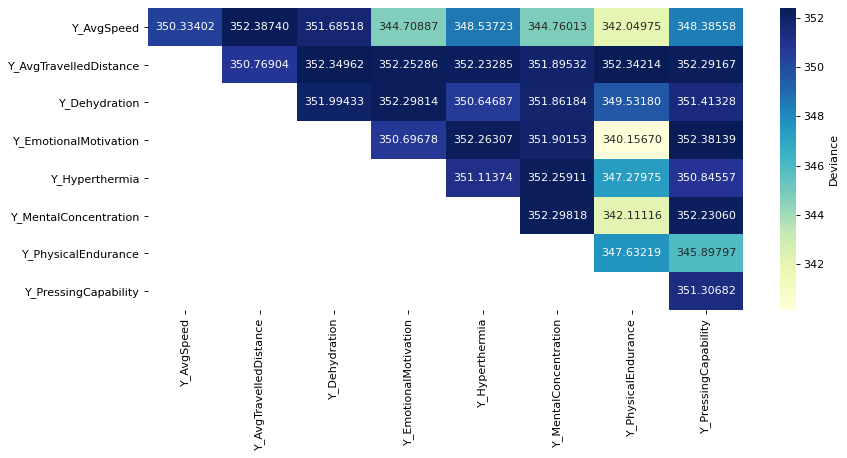

In [33]:
plt.figure(figsize=(12, 5), dpi=80)
utils_.plot_heatmap(df)

Perform best subset selection, specifying possible interactions or squared terms

In [34]:
from importlib import reload
reload(utils)

possible_interactions =  (
    ('Y_MentalConcentration', 'Y_PhysicalEndurance'),
    ('Y_EmotionalMotivation',  'Y_PhysicalEndurance'),
    ('Y_AvgSpeed',         'Y_PhysicalEndurance'),
    ('Y_AvgSpeed',         'Y_MentalConcentration'),
    ('Y_AvgSpeed',         'Y_EmotionalMotivation'),
)



In [ ]:
subsets = utils_.best_subset(df, possible_interactions, nfolds = 10, nCV = 10, verbose=True)

n_predictors = len(possible_interactions) + PREDICTORS_NUMBER

fig, ax = plt.subplots(figsize=(10,8))
utils.Utils.plot_best_subsets(subsets, n_predictors, ax)

100%|██████████| 8192/8192 [00:34<00:00, 238.85it/s]


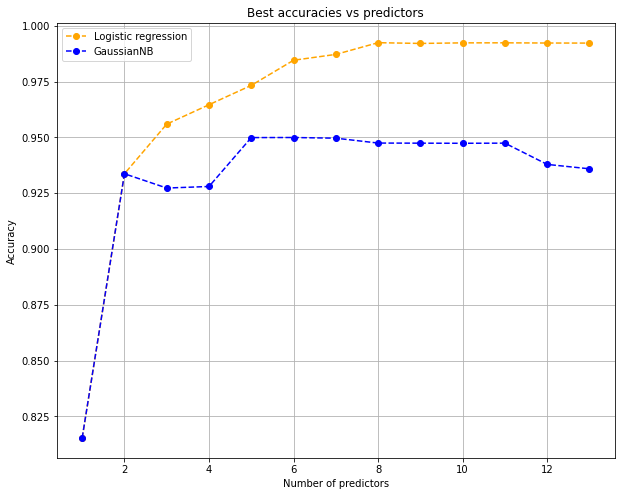

In [35]:
utils_logistic = utils.Utils(ABS_PATH, DATASET_FILENAME, Y_LABEL, PREDICTORS_NUMBER)
df = utils_logistic.read_dataset()
subsets_logistic = utils_logistic.best_subset(df, possible_interactions, nfolds = 10, nCV = 10, verbose=True)

utils_gaussian = utils.Utils(ABS_PATH, DATASET_FILENAME, Y_LABEL, PREDICTORS_NUMBER, gaussian_classifier=True)
df = utils_gaussian.read_dataset()
subsets_gaussian = utils_gaussian.best_subset(df, possible_interactions, nfolds = 10, nCV = 10, verbose=True)

fig, ax = plt.subplots(figsize=(10,8))
n_predictors = len(possible_interactions) + PREDICTORS_NUMBER
utils.Utils.plot_best_subsets(subsets_logistic, n_predictors, ax, legend="Logistic regression")
utils.Utils.plot_best_subsets(subsets_gaussian, n_predictors, ax, color="blue", legend="GaussianNB")


In [ ]:
n_predictors = len(possible_interactions) + PREDICTORS_NUMBER
fig, ax = plt.subplots(figsize=(10,8))
utils.Utils.plot_best_subsets(subsets_logistic, n_predictors, ax, legend="Logistic regression")
utils.Utils.plot_best_subsets(subsets_gaussian, n_predictors, ax, color="blue", legend="GaussianNB")





In [36]:
subsets_logistic['best_models'][8]['formula']

'Z_OppositeTeamDefence~Y_PhysicalEndurance+Y_AvgTravelledDistance+Y_Dehydration+Y_MentalConcentration+Y_AvgSpeed+Y_EmotionalMotivation+Y_Hyperthermia+Y_PressingCapability'

In [132]:
utils_logistic.save_model(subsets_logistic['best_models'][8], '_logistic')